In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importar datos

In [2]:
data = pd.read_csv('/work/Bot-de-Trafing//GOOG.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
1,2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2,2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
3,2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700
4,2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1.552000e+03
mean,1363.251031,1376.536655,1350.485275,1363.907909,1363.907909,1.606226e+06
std,636.005832,642.246010,629.518501,635.804921,635.804921,7.434770e+05
min,667.849976,672.299988,663.059998,668.260010,668.260010,3.468000e+05
25%,932.537521,937.486755,925.932480,932.207474,932.207474,1.145050e+06
50%,1146.450012,1158.549988,1136.341003,1149.984985,1149.984985,1.411900e+06
75%,1512.030029,1525.827484,1498.105011,1515.582550,1515.582550,1.828925e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,6.348100e+06


Graficar los datos

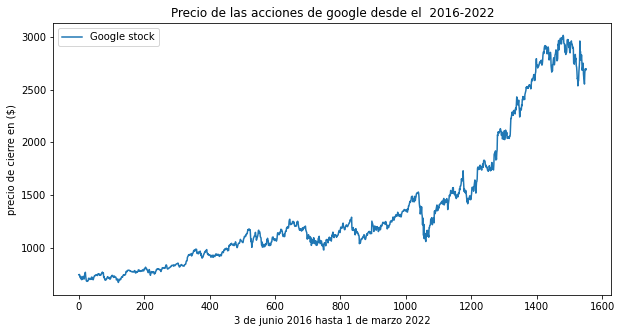

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label =('Google stock'))
plt.title('Precio de las acciones de google desde el  2016-2022')
plt.xlabel('3 de junio 2016 hasta 1 de marzo 2022')
plt.ylabel('precio de cierre en ($)')
plt.legend(loc ='upper left')
plt.show()

In [5]:
mvs30 = pd.DataFrame()
mvs30['Close'] = data['Close'].rolling(window=30).mean()
mvs30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1547,2710.754012
1548,2706.001677
1549,2703.175008
1550,2699.429346


In [6]:
mvs100 = pd.DataFrame()
mvs100['Close'] = data['Close'].rolling(window=100).mean()
mvs100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1547,2831.962415
1548,2832.113313
1549,2831.856113
1550,2831.218914


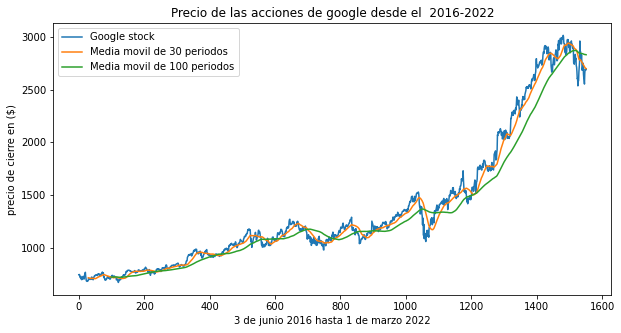

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label =('Google stock'))
plt.plot(mvs30['Close'], label =('Media movil de 30 periodos'))
plt.plot(mvs100['Close'], label =('Media movil de 100 periodos'))
plt.title('Precio de las acciones de google desde el  2016-2022')
plt.xlabel('3 de junio 2016 hasta 1 de marzo 2022')
plt.ylabel('precio de cierre en ($)')
plt.legend(loc ='upper left')
plt.show()

In [8]:
datos = pd.DataFrame()
datos['Google'] = data['Close']
datos['mvs30'] = mvs30['Close']
datos['mvs100'] = mvs100['Close']
datos

,Google,mvs30,mvs100
0,741.840027,NaN,NaN
1,742.580017,NaN,NaN
2,743.619995,NaN,NaN
3,726.390015,NaN,NaN
4,714.469971,NaN,NaN
...,...,...,...
1547,2653.469971,2710.754012,2831.962415
1548,2690.389893,2706.001677,2832.113313
1549,2697.820068,2703.175008,2831.856113
1550,2683.360107,2699.429346,2831.218914


In [9]:
def senal(datos):
    compra = []
    venta = []
    condicion = 0

    for dia in range(len(datos)):

        if datos['mvs30'][dia] > datos['mvs100'][dia]:
            if condicion != 1:
                compra.append(datos['Google'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        
        elif datos['mvs30'][dia] < datos['mvs100'][dia]:
            if condicion != -1:
                venta.append(datos['Google'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        
        else:
            compra.append(np.nan)
            venta.append(np.nan)
    
    return(compra,venta)


In [10]:
senales = senal(datos)
datos['Compra'] = senales[0]
datos['Venta'] = senales[1]
datos

,Google,mvs30,mvs100,Compra,Venta
0,741.840027,NaN,NaN,NaN,NaN
1,742.580017,NaN,NaN,NaN,NaN
2,743.619995,NaN,NaN,NaN,NaN
3,726.390015,NaN,NaN,NaN,NaN
4,714.469971,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1547,2653.469971,2710.754012,2831.962415,NaN,NaN
1548,2690.389893,2706.001677,2832.113313,NaN,NaN
1549,2697.820068,2703.175008,2831.856113,NaN,NaN
1550,2683.360107,2699.429346,2831.218914,NaN,NaN


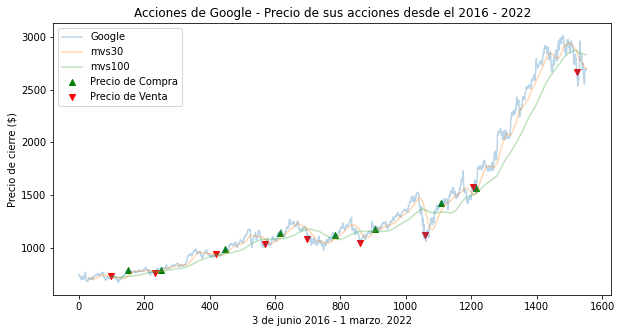

In [11]:
plt.figure(figsize=(10,5))
plt.plot(datos['Google'], label = 'Google', alpha = 0.3)
plt.plot(datos['mvs30'], label = 'mvs30', alpha = 0.3)
plt.plot(datos['mvs100'], label = 'mvs100', alpha = 0.3)
plt.scatter(datos.index, datos['Compra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(datos.index, datos['Venta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Acciones de Google - Precio de sus acciones desde el 2016 - 2022')
plt.xlabel('3 de junio 2016 - 1 marzo. 2022')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=add430d6-c4b8-458c-a6b4-6a764b1d4b2b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>